# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Paso 1. Descripción de los datos. Con el objetivo de importar y revisar los datos inicialmente: 
1. Importaré pandas
2. usaré pd.read_csv() cambiando el valor de separación de acuerdo al resultado de previsualización. 
3. Para explorar o previsualizar los datos usaré: info(), .columns, print(), head(). 

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
instacart_ds = pd.read_csv("instacart_orders.csv", sep = ";")
products_ds = pd.read_csv("products.csv", sep = ";")
aisles_ds = pd.read_csv("aisles.csv", sep = ";")
departments_ds = pd.read_csv("departments.csv", sep = ";")
order_products_ds = pd.read_csv("order_products.csv", sep = ";")

Siguiendo el patrón de importación de todos los valores por pd.read_csv(), también opté por no describir cada base de datos por separado sino que todos juntos.

In [3]:
# mostrar información de los DataFrames por print y head. 
print(instacart_ds.head())
print(order_products_ds.head())
print(aisles_ds.head())
print(departments_ds.head())
print(products_ds.head())

#conjunto de dfs: instacart_ds, order_products_ds,  aisles_ds, departments_ds, products_ds

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
   aisle_id                       aisle
0         1       prepared soups salads
1         2        

Posterior a correr la función head observé un patrón de separación de ";" así que corregí la función de lectura de csv adicionando el atributo sep = ";" para todos los casos. Este paso arregló la previsualización de los datos generando separaciones claras y notoriamente mayor cantidad de columnas. 

In [4]:
# mostrar información de los DataFrames por .info() y generar una variable que contiene todos los nombres de las columnas de los dataframes.
columns = [] #Inicializar la variable vacía de nombres de las columnas
def visualizar_data(df): 
    df.info()
    print("") #Mejorar estética de presentación de valores generando espacios entre impresiones.
    columns.append(df.columns.tolist()) #añadir valores a la variable de columnas

for df in [instacart_ds, order_products_ds,  aisles_ds, departments_ds, products_ds]: 
    visualizar_data(df) #Al ser 5 conjuntos de datos pensé en hacer menos repetitivo el llamado de funciones de visualización info y columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex:

De lo encontrado por info() se ve de primera instancia en orden que: 

El primer df(1)- instacart_ds:  está compuesta por 478967 filas, 6 columnas y solo la 6ta columna correspondiente a días desde la última compra tiene valores nulos. 

El segundo df(2)-order_products_ds:  está compuesta por 4 millones y medio de filas, 4 columnas y no comenta sobre su cantidad de valores nulos en una primera visualización.  Pendiente corroborar valores nulos o información adicional para verificar que la importación de los datos y su calidad es adecuada. 

El tercer df(3)- aisles_ds: está compuesta por 134 filas y 2 columnas sin valores nulos.

El cuarto df(4)-departments_ds: está compuesta por 21 filas y 2 columnas sin valores nulos.

El tercer df(5):products_ds: está compuesta por 49694 filas y 4 columnas con valores nulos en la segunda columna. 



In [5]:
#Cuadro de código opcional por preferencia propia: Me agrada tener los nombres de las columnas de dataframes a la mano.
instacart_cols = columns[0]
order_products_cols = columns[1]
aisles_cols = columns[2]
departments_cols = columns[3]
products_cols = columns[4]

for col in columns:
    print(col)
    
#Los nombres de las columnas están en formato adecuado minúsculas separadas por guiones sin espacios extra. 

['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
['order_id', 'product_id', 'add_to_cart_order', 'reordered']
['aisle_id', 'aisle']
['department_id', 'department']
['product_id', 'product_name', 'aisle_id', 'department_id']


## Conclusiones

Conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Se generaron 5 marcos de datos o dataframes con cantidad variante de columnas, se tienen variables para los nombres de las columnas por preferencia personal y se hace mención de que, sin generar cambios, las columnas están correctamente etiquetadas sin espacios extra y en minúsculas. Hay valores nulos para 2 columnas, 6ta columna del dataframe 1 o instacart_ds y segunda columna del dataframe 5 o products_ds. 

Nombres de variables de bases de datos: instacart_ds, order_products_ds,  aisles_ds, departments_ds, products_ds
Nombres de variables de columnas: instacart_cols, order_products_cols, aisles_cols, departments_cols, product_cols


# Paso 2. Preprocesamiento de los datos

Los datos serán preprocesados de la siguiente manera: 

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Plan para el Paso 2. Preprocesamiento de los datos.

Para el procesamiento de datos se tiene por objetivo revisar tipos de datos adecuados, sustitución de valores ausentes e identificación y remoción de duplicados. 
El plan para resolver los previos temas de calidad de datos son: 
1. Revisión con info(). Info(), previamente usado, generó un listado de las columnas y su tipo de dato. Se realizará una revisión de las columnas que puedan contener un tipo de valor errado y corroborar si hay cambios necesarios para los objetivos del proyecto. Cambios posibles: float a int para las variables que manejan número de días. 

2. Valores ausentes. Se identificará la tasa de presencia de ausentes mediante obtención de promedios usando isna() y mean(). Se reemplazarán los valores nulos dependiendo del tipo de dato con el que se trata ya sea con espacios vacíos "" o elementos de medida central para valores numéricos como mediana o media. 

3. Duplicados. La presencia de duplicados se revisará mediante duplicated() y drop_duplicates(). Para valores de duplicados no obvios como tipográficos se empleará nunique() y unique() así como bucles orientados a unificar los valores complementados con funciones de manipulación de strings como strip(), lower() o replace(). 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [6]:
#Revisión de cambios en tipos de datos. Sin cambios necesarios. 

#Valores atípicos float cuando podría ser int. #contiene valores nulos que no pueden ser 0 porque podría expresar que no han pasado días desde compras. 
#print(instacart_ds["days_since_prior_order"].sum()) #4997315 sin pasar a int. pérdida de valores al pasar a int?
#print(instacart_ds["days_since_prior_order"].isna().sum()) #28817 valores nulos
#print(instacart_ds["days_since_prior_order"].astype(int).sum()) #no aplica porque hay valores nulos. 

#Revisión simple de alfanuméricos. Los números saldrían en valores máximos y pueden complicar operaciones. No hay números se realizó revisión para order_id y user_id.
#print(instacart_ds["order_id"].min())
#print(instacart_ds["order_id"].max()) #no hay uso de alfanuméricos simplemente numéricos

# Revisa si hay pedidos duplicados
print(f"Hay {instacart_ds.duplicated().sum()} pedidos duplicados") #15 duplicados

#Hay valores nulos? 
instacart_ds.isna().mean()
print(f"{instacart_ds["days_since_prior_order"].isna().sum()} valores nulos en columna days_since_prior_order") #28819




Hay 15 pedidos duplicados
28819 valores nulos en columna days_since_prior_order


Hay 15 pedidos duplicados, 28819 valores nulos para la variable de días desde orden previa. 

Conforme al desarrollo del proyecto se revisará si estos valores han de ser cambiados. 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Hay lineas duplicadas, 15. Lo que tienen en común los duplicados no estoy seguro si lo se evaluar. 
Tengo en mente que los duplicados son iguales como tal. De todas formas posteriormente se hizo un llamado de order_id y hay 15 que faltan para completar el número de registro entonces algo representativo de duplicación es que 2 pedidos tengan el mismo número de id de orden. 

In [7]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wed_2am = instacart_ds[(instacart_ds["order_dow"]==3) & (instacart_ds["order_hour_of_day"]==2)]
print(wed_2am) #esto es lo que se pidió?
print(f"Hay {wed_2am["order_id"].duplicated().sum()} duplicados el miércoles a a las 2 am")
print("De un total de 121 pedidos, 15 están duplicados por lo tanto hay 106 pedidos el miércoles a las 2 am") #no robusto si se modifica la base de datos, línea de código no dinámico. 



        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

In [8]:
#corroborar valores únicos de forma alterna de order_id
print("")
print(f"Valores únicos de order_id: {instacart_ds["order_id"].nunique()}") 
#478952 y son 478967, 15 duplicados. 

print(f"El número de duplicados de order_id es: {instacart_ds["order_id"].duplicated().sum()}")
print("La suma de ambos números da el total de filas o registros de la base de datos: 478967")


Valores únicos de order_id: 478952


El número de duplicados de order_id es: 15
La suma de ambos números da el total de filas o registros de la base de datos: 478967


¿Qué sugiere este resultado?

Del total de pedidos 15 están repetidos. Sería interesante generar una columna que tenga información sobre cancelaciones de orden. ¿Por qué será que hay estos duplicados? 

In [9]:
# Elimina los pedidos duplicados
instacart_ds = instacart_ds.drop_duplicates()



In [10]:
# Vuelve a verificar si hay filas duplicadas
print(f"{instacart_ds.duplicated().sum()} duplicados encontrados") #0 duplicados

0 duplicados encontrados


In [11]:
# Vuelve a verificar si hay IDs duplicados de pedidos

print(f"{instacart_ds["order_id"].duplicated().sum()} duplicados encontrados para columna order_id") 

#Si se busca saber número de usuarios distintos interés personal. 
#y {instacart_ds["user_id"].duplicated().sum()} duplicados para user_id)
#print(f"{(len(instacart_ds)) - (instacart_ds["user_id"].duplicated().sum())} usuarios únicos") #forma alterna nunique.
#print(instacart_ds["user_id"].nunique()) #Si

0 duplicados encontrados para columna order_id


Describe brevemente tus hallazgos y lo que hiciste con ellos

Los datos parecen ser apropiados al enfoque del proyecto. Los id se manejan como enteros siendo enteros sin uso de alfanuméricos comprobados de forma breve usando la función max sobre las series con IDs. Hay valores nulos que no es apropiado reemplazar considerando que así son más precisos con la información que buscan transmitir. Nulo si no ha habido una compra previa. 28819 valores nulos. 

Se encontraron 15 valores duplicados mediante sum y duplicated y fueron removidos mediante drop_duplicates. Esta información fue corroborada de forma alterna con nunique sobre order_id consiguiendo la misma información una diferencia de 15 valores sobre el total de registros. 

Y por último se filtró el número de pedidos para el día miércoles a las 2 am siendo de 121 subtotales pero aquí estaban los 15 duplicados revisados por duplicated y sum dando un total de 106 pedidos. 




### `products` data frame

In [12]:
# Verifica si hay filas totalmente duplicadas
print(f"Hay {products_ds.duplicated().sum()} filas duplicadas en la base de datos products_ds")



Hay 0 filas duplicadas en la base de datos products_ds


In [13]:
# Verifica si hay IDs duplicadas de productos

print(f"{products_ds["product_id"].duplicated().sum()} duplicados en IDs de productos")

#print(products_cols) #'product_id', 'product_name', 'aisle_id', 'department_id'

0 duplicados en IDs de productos


In [14]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
#print(products_ds["product_name"].str.upper().duplicated().sum())

print(f"De {len(products_ds)} registros, hay {len(products_ds["product_name"].str.upper().unique())} distintos nombres de productos")
print(f"Hay {len(products_ds) - len(products_ds["product_name"].str.upper().unique())} duplicados en product_name o nombres de productos convertidos a mayúsculas del marco de datos products.") #1257

#Corroboración alterna por duplicated y sum. 
#print(products_ds["product_name"].duplicated().sum()) 
#1257 vs 1361 si se convierten en mayúscula. Hay mayores duplicados tras la conversión. 

#Revisión de Id de productos para corroborar también que los duplicados concuerden y no haya diferencias por errores tipográficos. Son únicos para cada producto, no es un análisis muy útil.
#products_ds["product_id"].duplicated().sum() #0
#products_ds["product_id"].nunique() #49694 todos los registros. Esto quiere decir, que cada producto aunque sea el mismo tipo tiene distinto id.
#y la descripción lo confirma

De 49694 registros, hay 48333 distintos nombres de productos
Hay 1361 duplicados en product_name o nombres de productos convertidos a mayúsculas del marco de datos products.


In [15]:
# Revisa si hay nombres duplicados de productos no faltantes
#No entendí a que se refiere la instrucción particularmente expresión "productos no faltantes"

#Faltantes == Aisle 21 or Department == 100
print(products_ds[((products_ds["aisle_id"]==100) & (products_ds["department_id"]==21))]["product_name"].str.upper().duplicated().sum()) #1257 duplicados en productos faltantes
print(products_ds[~((products_ds["aisle_id"]==100) & (products_ds["department_id"]==21))]["product_name"].str.upper().duplicated().sum()) #104 duplicados en productos no faltantes


#Intento de entender que tipo de información pueda serme útil del marco de datos para entender la instrucción. Sin éxito. 
#print(products_ds["aisle_id"].unique())
#print(products_ds["department_id"].unique())

1257
104


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No hay registros o filas duplicadas en la base de datos.

La columna de nombres de productos tiene 1361 duplicados. 1257 de productos faltantes y 104 de productos no faltantes. 

Sin más información o limitantes en el proyecto no veo necesario realizar cambios a los datos. 

### `departments` data frame

In [16]:
# Revisa si hay filas totalmente duplicadas
print(f"Hay {departments_ds.duplicated().sum()} filas duplicadas en el marco de datos: departments")

Hay 0 filas duplicadas en el marco de datos: departments


In [17]:
# Revisa si hay IDs duplicadas de productos
#print(departments_cols) #'department_id', 'department'

print(f"Hay {departments_ds["department_id"].duplicated().sum()} IDs duplicados en el marco de datos departments")


Hay 0 IDs duplicados en el marco de datos departments


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No hay duplicaciones ni en el marco de datos departments, ni en los valores de la columna ID.

### `aisles` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
#print(aisles_cols)

print(f"Hay {aisles_ds.duplicated().sum()} duplicados en el marco de datos aisles.")

Hay 0 duplicados en el marco de datos aisles.


In [19]:
# Revisa si hay IDs duplicadas de productos
print(f"Hay {aisles_ds["aisle_id"].duplicated().sum()} duplicados de Id en el marco de datos aisles")

Hay 0 duplicados de Id en el marco de datos aisles


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No hay duplicaciones en el marco de datos aisles ni en su columna correspondiente a los Ids. 

### `order_products` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
#print(order_products_cols) #'order_id', 'product_id', 'add_to_cart_order', 'reordered'
print(f"Hay {order_products_ds.duplicated().sum()} filas duplicadas en el marco de datos order_products")


Hay 0 filas duplicadas en el marco de datos order_products


In [21]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
#print(order_products_ds.head())
#order_products_ds.info() #4545007

#Conteo de compras posteriores a compras y compras únicas
print(order_products_ds["reordered"].value_counts()) #2683838 volvieron a comprar y 1861169 no. 

print(f"El marco de datos order_products tiene {len(order_products_ds)} registros")
print(f"Hay {order_products_ds["order_id"].duplicated().sum()} duplicados para Ids de órdenes")
print(f"{order_products_ds["product_id"].duplicated().sum()} duplicados para Ids de productos y")
print(f"{order_products_ds["add_to_cart_order"].duplicated().sum()} duplicados para órdenes a añadir al carro de compras")

print(f"{order_products_ds["order_id"].nunique()} distintos Ids de órdenes de compra") #450046
print(f"{((order_products_ds["order_id"].nunique())/len(order_products_ds))*100:.2f} % de los registros son órdenes de compras no repetidas") #0.099

reordered
1    2683838
0    1861169
Name: count, dtype: int64
El marco de datos order_products tiene 4545007 registros
Hay 4094961 duplicados para Ids de órdenes
4499434 duplicados para Ids de productos y
4544942 duplicados para órdenes a añadir al carro de compras
450046 distintos Ids de órdenes de compra
9.90 % de los registros son órdenes de compras no repetidas


Describe brevemente tus hallazgos y lo que hiciste con ellos.

order_products es un marco de datos extenso con 4 millones y medio de registros. 
En order_products no hay duplicados de registros.

De 4,545,007 registros, hay 4,094,961 duplicados para Ids de órdenes, 4,499,434 duplicados de Ids de productos y 4,544,942 duplicados para órdenes a añadir al carro de compras. 

Sin embargo, solo hay 450046 Ids de órdenes distintas. Lo que podría significar que de todas las órdenes de productos solo un 9.9% fueron concluidas. 

Por otra parte los datos de la columna de reordenados se tiene que 2,863,838 volvieron a comprar y 1,861,169 no. La validez de los datos de recompra sería interesante evaluarla a detalle. O quizá mediante uniones a números de usuario rastrear si se está considerando un mismo Id de órden aunque se vuelva a comprar ya que la cantidad de órdenes de compra distintos es al rededor de la sexta parte de las órdenes reordenadas.



## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [22]:
# Encuentra los valores ausentes en la columna 'product_name'
products_ds["product_name"].isna().sum()

np.int64(1258)

Describe brevemente cuáles son tus hallazgos. 1258 nombres de productos con valores nulos o ausentes en el marco de datos products. 

In [23]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
#products_cols
products_ds[products_ds["aisle_id"] == 100]["product_name"].isna().sum()


np.int64(1258)

Describe brevemente cuáles son tus hallazgos. Todos los nombres de productos con valor ausente provienen del pasillo con Id = 100. 1258.

In [24]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products_ds[products_ds["department_id"] == 21]["product_name"].isna().sum()

np.int64(1258)

Describe brevemente cuáles son tus hallazgos. 

Todos los nombres de productos ausentes previamente encontrados (1258) se encuentran en el Id de departamento = 21. 

In [25]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
#departments_cols #observar los nombres de columnas del marco de datos

print(departments_ds[departments_ds["department_id"]==21]["department"]) #Imprimir el departamento de la tabla departments donde el Id sea igual a 21. #Departamento 21 se llama faltantes. 
#print(aisles_cols) 
print(aisles_ds[aisles_ds["aisle_id"]==100]) #Pasillo con Id = 100 se llama también faltantes

20    missing
Name: department, dtype: object
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos. 

El departamento de Id 21 y el pasillo 100 corresponden a elementos faltantes. 

In [26]:
# Completa los nombres de productos ausentes con 'Unknown'
products_ds["product_name"] = products_ds["product_name"].fillna("Unknown") #Reemplazar valores nulos con "Unknown"
print(f"Hay {products_ds["product_name"].isna().sum()} valores nulos en products") #corroborar ausencia de valores ausentes

print(products_ds.head()) #Corroborar que los valores para nombres de productos no sean solo Unknown. 

#Corroborar cantidad de Unknown
products_ds[products_ds["product_name"]=="Unknown"]["product_name"].value_counts() #1258 "Unkown"


Hay 0 valores nulos en products
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


product_name
Unknown    1258
Name: count, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos. Se reemplazaron los valores nulos de nombres de producto con "Unknown" y se corroboró por head y por un conteo de los valores unknown que solo hubieran 1258 valores existentes conforme a los 1258 nulos reemplazados. 

### `orders` data frame

In [27]:
# Encuentra los valores ausentes
#instacart_cols #Revisión de nombres de columnas: 'order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'

print(instacart_ds.isna().mean()) #Confirma que hay nulos en la columna days_since_prior_order
print(f"{instacart_ds["days_since_prior_order"].isna().sum()} valores nulos en la columna days_since_prior_order.") #un total de 28817 nulos en la columna. 

order_id                  0.000000
user_id                   0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060167
dtype: float64
28817 valores nulos en la columna days_since_prior_order.


In [28]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(instacart_ds[~instacart_ds["order_number"]==1].isna().sum())
print("No hay valores ausentes en pedidos no primerizos")


order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64
No hay valores ausentes en pedidos no primerizos


Describe brevemente tus hallazgos y lo que hiciste con ellos. Revisé la cantidad de nulos en el marco de datos instacart_orders. La columna days_since_prior_order tiene 28817 valores nulos. Después revisé cuantos valores nulos hay en pedidos no primerizos y hay 0 de tal forma que todos los valores nulos se encuentran en los pedidos primarios pues no hay días desde la órden previa. 



### `order_products` data frame

In [29]:
# Encuentra los valores ausentes
#print(order_products_cols) #Nombres de las columnas: 'order_id', 'product_id', 'add_to_cart_order', 'reordered'
print(order_products_ds.isna().mean()) #revisión de nulos en el marco de datos como tasa de nulos. 
print(f"{order_products_ds["add_to_cart_order"].isna().sum()} valores nulos en add_to_cart_order") #revisión de cantidad de nulos, en la columna con confirmación de presencia de nulos. #836 nulos en "add_to_cart_order".  

order_id             0.000000
product_id           0.000000
add_to_cart_order    0.000184
reordered            0.000000
dtype: float64
836 valores nulos en add_to_cart_order


In [30]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products_ds["add_to_cart_order"].min())
print(order_products_ds["add_to_cart_order"].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos. En el marco de datos order_products hay 836 valores nulos en la columna add_to_cart_order. Y los valores mínimos y máximos para esta columna son 1 y 64 respectivamente. 

In [31]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
orderids_where_nan = order_products_ds[order_products_ds["add_to_cart_order"].isna()]["order_id"]
print(orderids_where_nan) #836 order ids. 


737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [32]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.\
order_id_grouped_where_na = order_products_ds[order_products_ds["add_to_cart_order"].isna()].groupby("order_id")
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
order_id_grouped_where_na.count().sort_values("product_id") #1 producto como mínimo y un máximo de 63. 

,product_id,add_to_cart_order,reordered
order_id,,,
9310,1,0,1
747668,1,0,1
888470,1,0,1
2621907,1,0,1
2170451,1,0,1
...,...,...,...
1959075,34,0,34
171934,40,0,40
2136777,44,0,44


Describe brevemente cuáles son tus hallazgos. Todos los pedidos con valores ausentes para add_to_cart_order tienen menos de 64 productos siendo 1 el mínimo. 

In [33]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products_ds["add_to_cart_order"] = order_products_ds["add_to_cart_order"].fillna(999).astype(int)

#Corroborar tipo de dato y reemplazos.
order_products_ds.info() #se confirma el tipo entero en la columna add_to_cart_order. 
order_products_ds["add_to_cart_order"].max() #se confirma el 999 como número máximo, reemplazo efectuado con éxito. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


np.int64(999)

Describe brevemente tus hallazgos y lo que hiciste con ellos. 

Se hizo el reemplazo de valores nulos por 999 y el cambio de dato a tipo entero. 

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [34]:
print(instacart_ds["order_hour_of_day"].unique()) #todos los valores
print(instacart_ds["order_hour_of_day"].min()) #valor mínimo
print(instacart_ds["order_hour_of_day"].max()) #valor máximo 

print(instacart_ds["order_dow"].unique())
print(instacart_ds["order_dow"].min())
print(instacart_ds["order_dow"].max())

[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]
0
23
[6 5 0 4 3 1 2]
0
6


Escribe aquí tus conclusiones. Los valores están dentro de los rangos deseados 0-23 para hora del día y 0-6 para día de la semana. 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

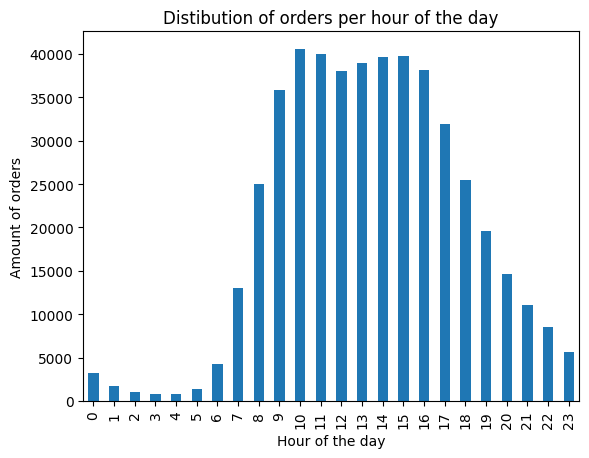

In [ ]:
orders_per_hour = instacart_ds["order_hour_of_day"].value_counts().sort_index()
orders_per_hour.plot(x= orders_per_hour.index, y= orders_per_hour.values, xlabel= "Hora del día (24 H)", ylabel = "Cantidad de órdenes", title = "Distribución de cantidad de órdenes a través de las horas del día", kind = "bar")
plt.show()

Escribe aquí tus conclusiones. Las primeras 7 horas del día hay pocas órdenes menor a 4300 órdenes por hora. Las siguientes horas de menos venta son las últimas 3 horas del día 21-23 11K para la 21, 8512 para la hora 22 y 5611 para la hora 23. 
Las demás son horas centrales con rango de 13043 a 40578. La hora 10 es la hora con mayor cantidad de órdenes. 



### [A3] ¿Qué día de la semana compran víveres las personas?

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of orders through the days of the week'}, xlabel='Days of the week', ylabel='Amount of orders'>

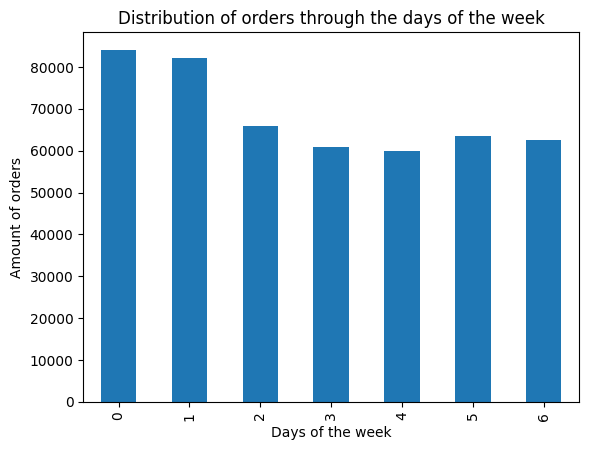

In [ ]:
dow_orders = instacart_ds["order_dow"].value_counts().sort_index() #Contar las órdenes por día de la semana
print(dow_orders)
dow_orders.plot(kind = "bar", x = dow_orders.index, y = dow_orders.values, title = "Distribución de órdenes a través de los días de la semana", xlabel= "Días de la semana", ylabel = "Cántidad de órdenes" )


Escribe aquí tus conclusiones. En todos los días se compran viveres siendo el domingo (día 0) el día con mayor número de compras. En segundo lugar el día lunes, seguido por martes, viernes, sábado, miércoles y por último jueves. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

2640
51337


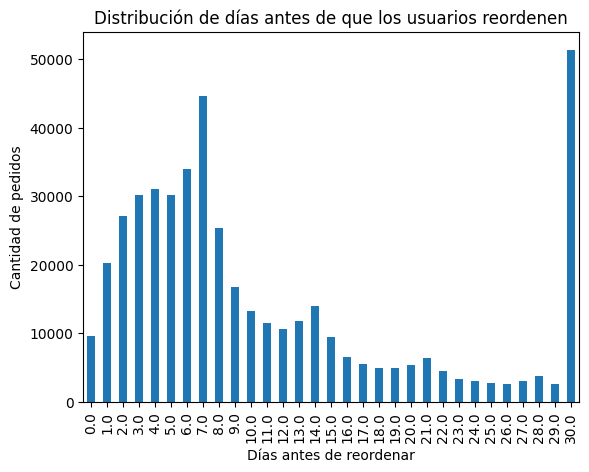

In [37]:
tiempo_repedido = instacart_ds["days_since_prior_order"].value_counts().sort_index()
#print(tiempo_repedido) #lista de valores a través de los días. 
print(tiempo_repedido.min())
print(tiempo_repedido.max())
tiempo_repedido.plot(x= tiempo_repedido.index, y = tiempo_repedido.values, xlabel= "Días antes de reordenar", ylabel= "Cantidad de pedidos", title = "Distribución de días antes de que los usuarios reordenen", kind="bar")
plt.show()

Escribe aquí tus conclusiones. Los valores mínimos 0 y 30 días respectivamente tienen 2640 y 51337 valores. Es posible que solo se registren los días desde última órden hasta 30 días lo equivalente a no hubo recompra quizá. 

Y por otra parte que aquellas órdenes recién recompradas tengan menos de 24 horas de ser compradas se cataloguen como 0 días desde la última compra y son por otra parte las compras en el día presente. 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

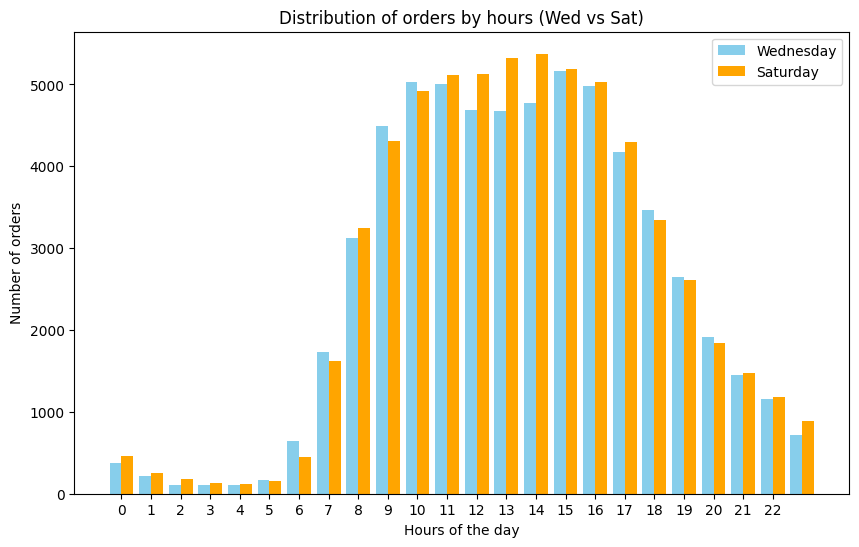

In [ ]:
wed = instacart_ds[instacart_ds["order_dow"]== 3]["order_hour_of_day"].value_counts().sort_index()
sat = instacart_ds[instacart_ds["order_dow"]== 6]["order_hour_of_day"].value_counts().sort_index()
#print(wed) #lista de ordenes por hora en miercoles. 
plt.figure(figsize=(10, 6))
plt.bar(wed.index - 0.2, wed.values, width = 0.4, label = "Miércoles", color = "skyblue")
plt.bar(sat.index + 0.2, sat.values, width= 0.4, label = "Sábado", color = "orange")

#xlab = "Hours of the day", ylab = "Number of orders", title = "Distribution of orders through hours of the day"
plt.xlabel("Horas del día (24H)")
plt.ylabel("Número de órdenes")
plt.title("Distribución de órdenes a través de las horas (Miércoles contra Sábado)")
plt.xticks(range(0, 23))
plt.legend()
plt.show()

# Diferencias entre órdenes por hora en miércoles y sábado 
Aunque el comportamiento de órdenes a través de las horas está conservado en ambos días, de 12 a 14 horas hay menor número de órdenes los miércoles que los sábados. 

Escribe aquí tus conclusiones

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

11.0


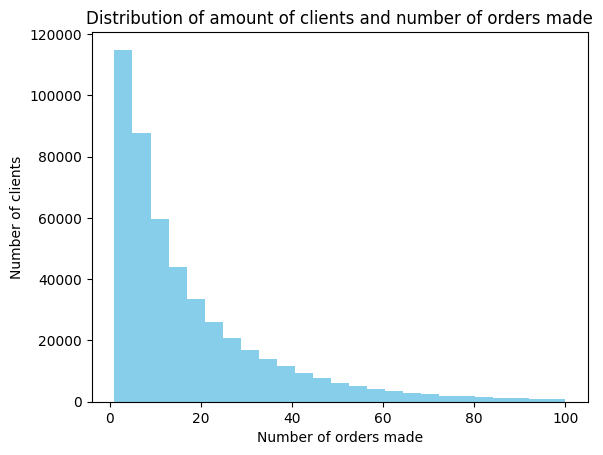

In [ ]:
#Agrupar por número de órdenes 
#print(instacart_ds.shape) #478952, 6 columnas. 100 valores distintos para número de órdenes
order_per_user = instacart_ds[["user_id", "order_number"]]
#print(instacart_ds["user_id"].nunique()) #157437 clientes
#print(instacart_ds["order_number"].nunique()) #100 valores distintos

print(instacart_ds["order_number"].median())#11

#Graficar cuantos clientes hay por cada número de órdenes. No se puede graficar cuantos pedidos por cliente asumiendo 160 mil clientes. 

plt.hist(order_per_user["order_number"], bins = 25, color = "skyblue")
plt.title("Distribución de número de clienes y órdenes realizadas")
plt.xlabel("Número de órdenes")
plt.ylabel("Número de clientes")
plt.show()



Escribe aquí tus conclusiones. Conforme el número de órdenes aumenta el número de clientes disminuye. 
Siendo que la mayoría de los clientes realizan menos de 16 órdenes. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [40]:
instacart_cols #'order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'
order_products_cols #"order_id", , 'product_id', 'add_to_cart_order', 'reordered'
top20_productos_id = order_products_ds["product_id"].value_counts().head(20).index.tolist()
#print(top20_productos_id)

top20products_id_name = products_ds[products_ds["product_id"].isin(top20_productos_id)] #top 20 productos más populares
top20_productos_pop = top20products_id_name[["product_id","product_name"]]
print(top20_productos_pop)



       product_id              product_name
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
13175       13176    Bag of Organic Bananas
16796       16797              Strawberries
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
22934       22935      Organic Yellow Onion
24851       24852                    Banana
24963       24964            Organic Garlic
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
28203       28204        Organic Fuji Apple
39274       39275       Organic Blueberries
40705       40706    Organic Grape Tomatoes
45006       45007          Organic Zucchini
47208       47209      Organic Hass Avocado
47625       47626               Large Lemon
47765       47766           Organic Avocado
49682       49683            Cucumber Kirby


Escribe aquí tus conclusiones. Lo que más se vende son frutas, leche y especias. 


1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [41]:
#Se usará el marco de datos order_products
#order_products_cols #'order_id', 'product_id', 'add_to_cart_order', 'reordered'
#Cada id de órden tiene múltiples productos. Se quiere saber del total de órdenes cual es el promedio de productos comprados. 

orderid_products_df = order_products_ds[["order_id", "product_id"]] #separar los valores relevantes: órdenes y productos. 
productos_por_orden = orderid_products_df.groupby("order_id").count() #Conteo del número de productos por órden

print(productos_por_orden) #número de productos por órden. 

conteo_de_ordenes_por_numero_de_productos = productos_por_orden["product_id"].value_counts().sort_index() #Cuenta cuantas órdenes tienen el mismo número de productos. 1 producto tantas órdenes, 2 ..., 

print(conteo_de_ordenes_por_numero_de_productos)




          product_id
order_id            
4                 13
9                 15
11                 5
19                 3
20                 8
...              ...
3421034           17
3421053            9
3421071            5
3421077            4
3421079            1

[450046 rows x 1 columns]
product_id
1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: count, Length: 90, dtype: int64


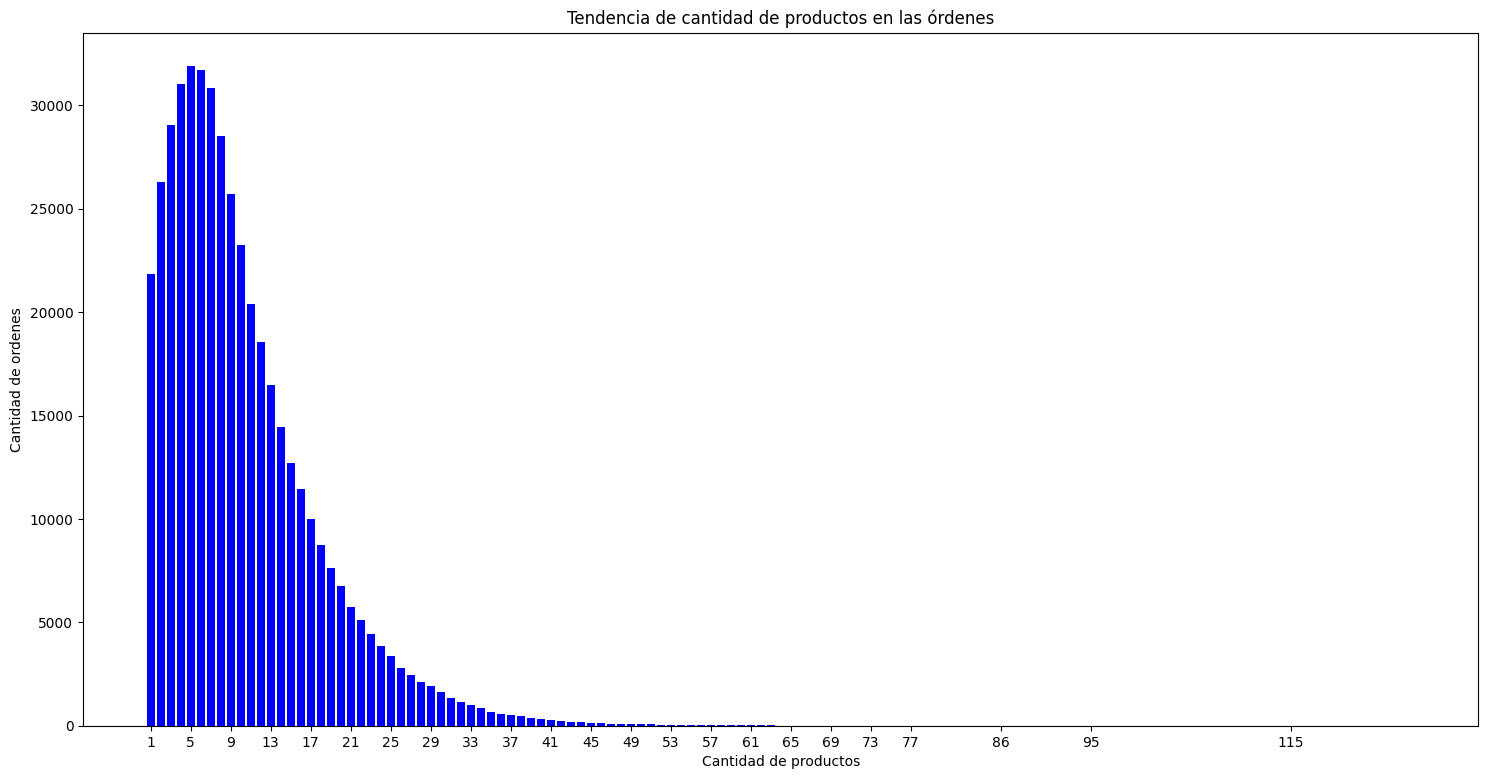

In [42]:
plt.figure(figsize=(18,9))
plt.bar(conteo_de_ordenes_por_numero_de_productos.index, conteo_de_ordenes_por_numero_de_productos.values, color = "blue")
plt.xlabel("Cantidad de productos")
plt.ylabel("Cantidad de ordenes")
plt.title("Tendencia de cantidad de productos en las órdenes")
plt.xticks(conteo_de_ordenes_por_numero_de_productos.index[::4])
plt.show()

In [43]:
productos_por_orden.describe() #Análisis de dispersión rápido para buscar explicar en conclusiones. 

,product_id
count,450046.000000
mean,10.098983
std,7.540206
min,1.000000
25%,5.000000
50%,8.000000
75%,14.000000
max,127.000000


Escribe aquí tus conclusiones. Hay una tendencia márcada hacia pocos artículos comprados por órden. El 50% de las órdenes tienen 8 productos o menos y un 75% hasta 14 productos mientras que hay órdenes que llegan hasta la compra de 127 productos. La distribución está sesgada hacia tener pocos productos por órden. Interesante buscar generar promociones, programa de recompensas o mercadotecnia y buscar revisar su impacto hacia formar carritos más llenos de productos. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [44]:
#Usaré order_products agrupando por product id y reordered y contándolos. Tomaré los primeros 20 valores y le añadiré un index.tolist() para buscar en la base de datos original. 

reordenados_por_producto = order_products_ds[["product_id", "reordered"]]
print(reordenados_por_producto)

conteo_productos_reordenados = reordenados_por_producto[reordenados_por_producto["reordered"]==1]["product_id"].value_counts().head(20).index.tolist() #Enfoque en solo los productos que se vuelven a pedir y contar los valores donde me quedo con los 20 de mayor conteo y particularmente sus índices correspondientes a los id de productos. 
print(conteo_productos_reordenados)


         product_id  reordered
0             11440          0
1              1560          1
2             26683          1
3              8670          1
4              1940          1
...             ...        ...
4545002       15290          1
4545003       21914          0
4545004       47766          1
4545005         691          1
4545006       28733          0

[4545007 rows x 2 columns]
[24852, 13176, 21137, 21903, 47209, 47766, 27845, 47626, 27966, 16797, 26209, 22935, 24964, 45007, 49683, 28204, 8277, 39275, 5876, 49235]


In [45]:
#uso de los product_id del top 20 pedidos para mostrar sus nombres e id de productos. 
nombres_e_id_top20_productos_pedidos = products_ds[products_ds["product_id"].isin(conteo_productos_reordenados)][["product_id", "product_name"]]
print(nombres_e_id_top20_productos_pedidos)

       product_id              product_name
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
13175       13176    Bag of Organic Bananas
16796       16797              Strawberries
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
22934       22935      Organic Yellow Onion
24851       24852                    Banana
24963       24964            Organic Garlic
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
28203       28204        Organic Fuji Apple
39274       39275       Organic Blueberries
45006       45007          Organic Zucchini
47208       47209      Organic Hass Avocado
47625       47626               Large Lemon
47765       47766           Organic Avocado
49234       49235       Organic Half & Half
49682       49683            Cucumber Kirby


In [46]:
#Exploración personal: Son los mismos que los más comprados? 
#productos pop vs productos recomprados. 

iguales = top20_productos_pop["product_name"].equals(nombres_e_id_top20_productos_pedidos["product_name"])
print(iguales) #no son iguales

cuantos_difieren = top20_productos_pop["product_name"].unique() == nombres_e_id_top20_productos_pedidos["product_name"].unique()
print(cuantos_difieren) #5productos difieren 



False
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False  True]


Escribe aquí tus conclusiones. 

Se mostraron los 20 artículos que más se vuelven a ordenar. Los 20 artículos más pedidos no son iguales que los 20 artículos que más se vuelven a ordenar. 5 de ellos difieren. 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [47]:
#Demostrar la tasa entre las veces que se piden los productos y las que se vuelven a repedir.
#reconteo de product id 
conteo_compras = order_products_ds[["product_id"]].value_counts().sort_values().reset_index(name="total_compras") #aqui solo 1 columna. Con el count pasaría a 2 columnas el id y numero de veces. 
print(conteo_compras)
#reconteo de product id reordered 
conteo_recompras = reordenados_por_producto[reordenados_por_producto["reordered"]==1].groupby(["product_id"]).size().reset_index(name="total_recompras")

print(conteo_recompras) #aqui son 2 columnas id y si se ha recomprado o no. 

#tasa_comprados_reordenados = reconteo_product_id/conteo_reordered

       product_id  total_compras
0            5410              1
1           49657              1
2           49654              1
3           49650              1
4           49646              1
...           ...            ...
45568       47209          29773
45569       21903          33971
45570       21137          37039
45571       13176          53297
45572       24852          66050

[45573 rows x 2 columns]
       product_id  total_recompras
0               1              158
1               3               31
2               4               25
3               7                1
4               8                6
...           ...              ...
36223       49690                4
36224       49691               31
36225       49692                5
36226       49693               11
36227       49694                3

[36228 rows x 2 columns]


In [ ]:
#Juntar los valores de compras y recompras en un df
df_compras_recompras = pd.merge(conteo_compras, conteo_recompras, on= "product_id", how= "left")
df_compras_recompras["total_recompras"] = df_compras_recompras["total_recompras"].fillna(0).astype(int)
print(df_compras_recompras["product_id"].nunique()) #si son 45573 productos. Quería ver si cambiar el eje x. 
print(order_products_ds["product_id"].nunique()) #directo del marco de datos original. Siguen siendo 45573 productos distintos. 

df_compras_recompras["proporcion_recompra"] = df_compras_recompras["total_recompras"]/df_compras_recompras["total_compras"]
print(df_compras_recompras)




45573
45573
       product_id  total_compras  total_recompras  proporcion_recompra
0            5410              1                0             0.000000
1           49657              1                1             1.000000
2           49654              1                0             0.000000
3           49650              1                0             0.000000
4           49646              1                0             0.000000
...           ...            ...              ...                  ...
45568       47209          29773            23629             0.793639
45569       21903          33971            26233             0.772217
45570       21137          37039            28639             0.773212
45571       13176          53297            44450             0.834006
45572       24852          66050            55763             0.844254

[45573 rows x 4 columns]


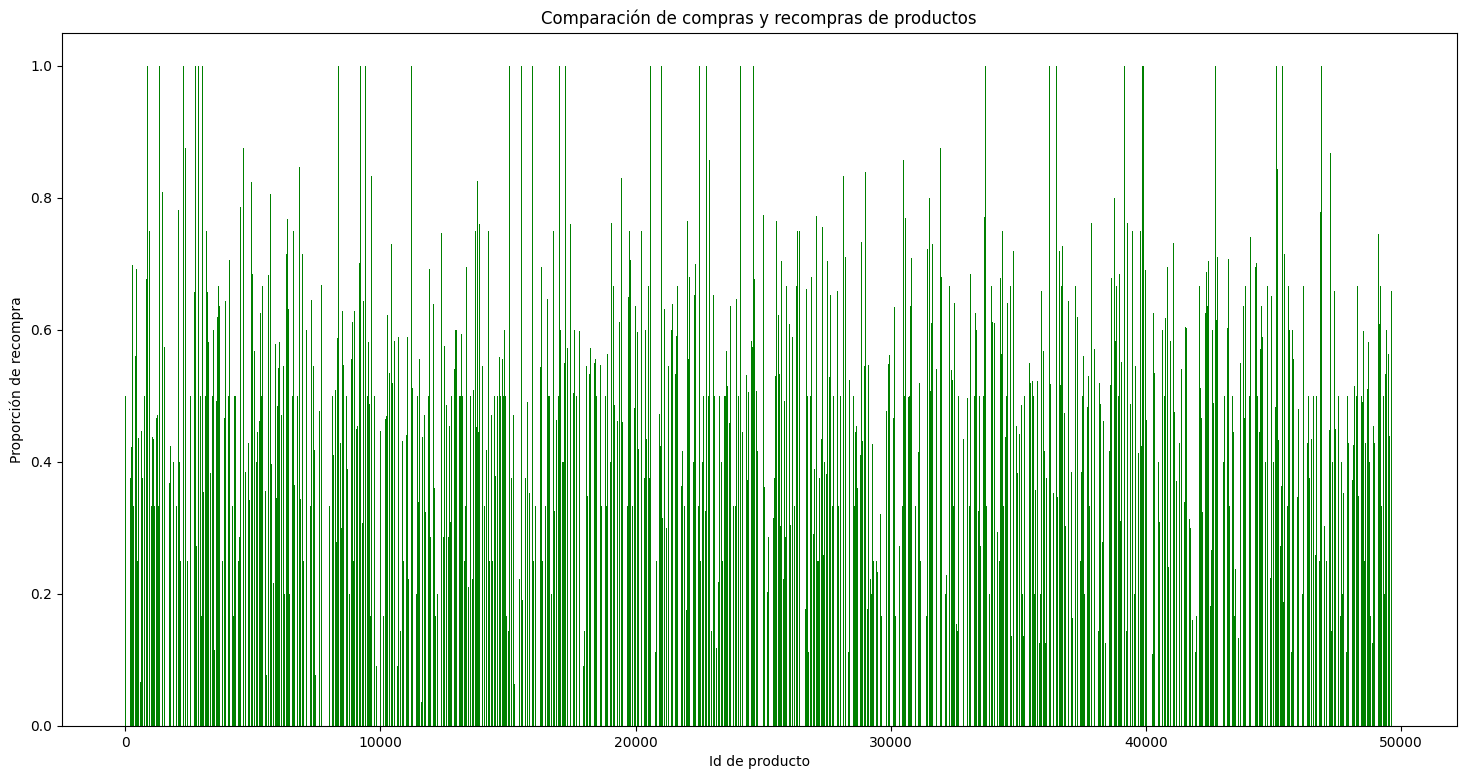

In [57]:
#graficar
plt.figure(figsize=(18, 9))
#plt.bar(df_compras_recompras["product_id"] -0.2, df_compras_recompras["total_compras"], label = "Compras totales", color = "Skyblue") #gráfico ininteligible busqué mejor graficar la proporción
#plt.bar(df_compras_recompras["product_id"] +0.2, df_compras_recompras["total_recompras"], label = "Recompras", color = "orange")
plt.bar(df_compras_recompras["product_id"], df_compras_recompras["proporcion_recompra"], color = "green" )
plt.title("Comparación de compras y recompras de productos")
plt.xlabel("Id de producto")
plt.ylabel("Proporción de recompra")
#plt.legend()
plt.show()

In [58]:
df_compras_recompras["proporcion_recompra"].describe()

count    45573.000000
mean         0.386707
std          0.272132
min          0.000000
25%          0.166667
50%          0.408163
75%          0.575758
max          1.000000
Name: proporcion_recompra, dtype: float64

Escribe aquí tus conclusiones. El promedio de la proporción de recompra es de 38% del número de compras. 38% de las compras son recompras. 

Es un valor improbable observar que el número de compras sea igual al número de recompras. Siempre habrá más productos comprados que recomprados, al menos el de la primera compra. 

Es una limitante buscar observar 45573 productos a la vez. 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [62]:
#Del total de productos que los clientes compran, cuantos recomprados. 
#Agrupar por cliente. Contar los productos que compran y cuantos de ellos ya los habían recomprado.

#instacart tiene los nombres de usuario y órdenes hechas. Puedo unir instacart a order_products por order_id retirando información innecesaria de ambos. 
#El objetivo es añadirle el user_id a cada registro por order_id en order_products. 

#order_products_cols #'order_id', 'product_id', 'add_to_cart_order', 'reordered' #add to cart order no lo necesito
#instacart_cols #'order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'

#Por cliente. Cuanto compran, cuanto recompran. Una proporcion basta. 
productos_orden = order_products_ds[["order_id", "product_id", "reordered"]] #se retira add to cart order. Fuera de la perspectiva de la pregunta problema. 
print(productos_orden.head())

ordenes_por_usario = instacart_ds[["order_id", "user_id"]]
print(ordenes_por_usario.head())
#unir los subsegmentos de los marcos de datos productos_orden y ordenes_por_usuario sobre ordenes por usuario en order_id
productos_por_usuario = pd.merge(productos_orden, ordenes_por_usario, on="order_id", how="left")
print(productos_por_usuario.head())

   order_id  product_id  reordered
0   2141543       11440          0
1    567889        1560          1
2   2261212       26683          1
3    491251        8670          1
4   2571142        1940          1
   order_id  user_id
0   1515936   183418
1   1690866   163593
2   1454967    39980
3   1768857    82516
4   3007858   196724
   order_id  product_id  reordered  user_id
0   2141543       11440          0    58454
1    567889        1560          1   129474
2   2261212       26683          1    47476
3    491251        8670          1   134505
4   2571142        1940          1   155995


In [65]:
#Agrupar por user_id
comprados = productos_por_usuario.groupby("user_id")["product_id"].count()
print(comprados)
recomprados = productos_por_usuario[productos_por_usuario["reordered"]==1].groupby("user_id")["reordered"].count()
print(recomprados)

user_id
2          26
4           2
5          12
6           4
7          14
         ... 
206203     27
206206     21
206207     46
206208    125
206209     25
Name: product_id, Length: 149626, dtype: int64
user_id
2          1
5          8
7         13
11         3
12         3
          ..
206203     6
206206    15
206207    41
206208    87
206209     8
Name: reordered, Length: 132991, dtype: int64


In [102]:
#Ya tengo las columnas de comprados y recomprados ahora conseguir unirlos, graficar la proporción y describirla.
proporcion_recompra_por_cliente = pd.merge(comprados, recomprados, on="user_id", how="left")
print(proporcion_recompra_por_cliente.head())
#remover Nan. Todos los artículos sin recompra serán retirados del estudio ya que no se puede sacar una proporción dividiendo 0. 
print(proporcion_recompra_por_cliente["reordered"].isna().sum()) #16635 clientes de 149626 serán removidos por no recompra. 
proporcion_recompra_por_cliente_sinNA = proporcion_recompra_por_cliente.dropna()
#print(16635/149626) #11 por ciento; cantidad de datos removidos por valores nulos. 
print(proporcion_recompra_por_cliente_sinNA.head()) #se removieron las filas con NA. 11% de los datos

         product_id  reordered
user_id                       
2                26        1.0
4                 2        NaN
5                12        8.0
6                 4        NaN
7                14       13.0
16635
         product_id  reordered
user_id                       
2                26        1.0
5                12        8.0
7                14       13.0
11               15        3.0
12               12        3.0


In [104]:
#obtener la proporcion dividiendo recompras entre compras
proporcion_recompra_por_cliente_sinNA["proporcion_recompra"] = proporcion_recompra_por_cliente_sinNA["reordered"]/proporcion_recompra_por_cliente_sinNA["product_id"] #Se dividen los recomprados entre los comprados para saber la proporcion de recompra. 
print(proporcion_recompra_por_cliente_sinNA.head())
print(proporcion_recompra_por_cliente_sinNA["proporcion_recompra"].nunique()) #5219 proporciones


#Separar los conteos en rangos de proporción
bins = [0, 0.1, 0.25, 0.5, 0.75, 1]
labels = ["0-0.1", "0.1-0.25", "0.25-0.5", "0.5-0.75", "0.75-1"]
proporcion_recompra_por_cliente_sinNA["proporcion_recompra_binned"] = pd.cut(
    proporcion_recompra_por_cliente_sinNA["proporcion_recompra"], bins=bins, labels=labels, include_lowest=True
) 
conteo_usuarios_por_intervalo = proporcion_recompra_por_cliente_sinNA["proporcion_recompra_binned"].value_counts().sort_index()
print(conteo_usuarios_por_intervalo.head())

         product_id  reordered  proporcion_recompra proporcion_recompra_binned
user_id                                                                       
2                26        1.0             0.038462                      0-0.1
5                12        8.0             0.666667                   0.5-0.75
7                14       13.0             0.928571                     0.75-1
11               15        3.0             0.200000                   0.1-0.25
12               12        3.0             0.250000                   0.1-0.25
5219
proporcion_recompra_binned
0-0.1        3473
0.1-0.25    15846
0.25-0.5    39134
0.5-0.75    42862
0.75-1      31676
Name: count, dtype: int64


C:\Users\david\AppData\Local\Temp\ipykernel_14416\3494326322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proporcion_recompra_por_cliente_sinNA["proporcion_recompra"] = proporcion_recompra_por_cliente_sinNA["reordered"]/proporcion_recompra_por_cliente_sinNA["product_id"] #Se dividen los recomprados entre los comprados para saber la proporcion de recompra.
C:\Users\david\AppData\Local\Temp\ipykernel_14416\3494326322.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proporcion_recompra_por_cliente_s

In [115]:
conteo_usuarios_por_intervalo.describe() #el 50% de los datos está antes de 31676 clientes. 
print(conteo_usuarios_por_intervalo) #132991 si se suman

total_usuarios = 132991
#obtener los porcentajes de usuarios que se encuentran en cada rango 
rangos = ["0-0.1", "0.1-0.25", "0.25-0.5", "0.5-0.75", "0.75-1"]
porcentajes_usuarios = [((3473/total_usuarios)*100), ((15846/total_usuarios)*100), ((39134/total_usuarios)*100), ((42862/total_usuarios)*100), ((31676/total_usuarios)*100)]

data = {
    "Rangos": rangos, 
    "Porcentaje de Usuarios": porcentajes_usuarios
}
df_porcentajes_clientes_por_intervalo_proporcion_compra_recompra = pd.DataFrame(data) #Este df me ayuda a entender como se distribuyen los clientes en las proporciones de recompra.
print(df_porcentajes_clientes_por_intervalo_proporcion_compra_recompra)

proporcion_recompra_binned
0-0.1        3473
0.1-0.25    15846
0.25-0.5    39134
0.5-0.75    42862
0.75-1      31676
Name: count, dtype: int64
     Rangos  Porcentaje de Usuarios
0     0-0.1                2.611455
1  0.1-0.25               11.915092
2  0.25-0.5               29.426051
3  0.5-0.75               32.229249
4    0.75-1               23.818153


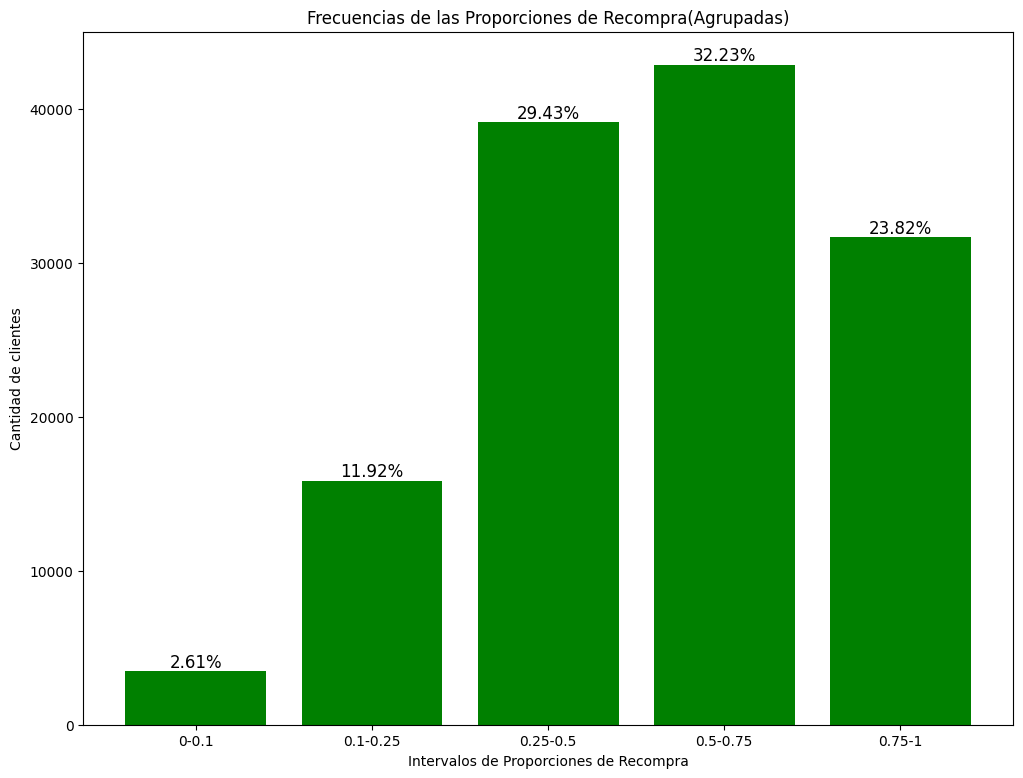

In [118]:

#Graficar las proporciones de recompra y cuantos clientes tienen cada proporcion. 
#En lugar de cliente como categorico sería bueno un conteo de proporciones. Es decir eje x = proporciones, ejey = cantidad de clientes con la proporcion. Barras
plt.figure(figsize=(12, 9))
bars = plt.bar(conteo_usuarios_por_intervalo.index, conteo_usuarios_por_intervalo.values, color = "green")

# Añadir los porcentajes del DataFrame como texto sobre las barras
for i, bar in enumerate(bars):
    percentage = df_porcentajes_clientes_por_intervalo_proporcion_compra_recompra["Porcentaje de Usuarios"].iloc[i]  # Obtener el porcentaje del DataFrame
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, 
             f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)
plt.xlabel("Intervalos de Proporciones de Recompra")
plt.ylabel("Cantidad de clientes")
plt.title("Frecuencias de las Proporciones de Recompra(Agrupadas)")
plt.show()

Escribe aquí tus conclusiones. 

La mayoría de los clientes (61.66%) recompran desde 25 porciento de sus productos hasta 75% de sus productos. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [120]:
#20 principales artículos que las personas ponen primero en sus carritos. 
#Me llama la atención que dice que las personas ponen primero en sus carritos. 
#Veo más adecuado no unir a usuarios, sino a los productos que se ponen primero en cada órden. 

#Contar los artículos top 20 número 1 en los carritos y hacer la lista de los top 20 product_id que estan en esa posición. 
#Buscar esos product_id en su nombre de producto en marco de datos product. 
#Para conseguir los clientes se puede hacer un merge de instacart user_id por order_id. 
#Agrupar por user_id, order_id, "add_to_cart_order" and get the list of the top 20. 

#seleccionar la información relevante del marco de datos: ordenes, productos, orden en el carrito. 
products_cart_order = order_products_ds[["order_id","product_id", "add_to_cart_order"]] 

#Conseguir los artículos que se encuentran en la primera posición de cada órden. 
primeros_productos = products_cart_order[products_cart_order["add_to_cart_order"]==1]

#Contar los productos y tomar los primeros 20 valores de product_id
top20_productos_primeros = primeros_productos["product_id"].value_counts().head(20)

#Buscar en el marco de datos products el nombre conforme a esos ids
nombres_top20_productos_primeros = products_ds[products_ds["product_id"].isin(top20_productos_primeros.index)]

print(nombres_top20_productos_primeros[["product_id", "product_name"]])


       product_id                 product_name
195           196                         Soda
5784         5785  Organic Reduced Fat 2% Milk
12340       12341                Hass Avocados
13175       13176       Bag of Organic Bananas
16796       16797                 Strawberries
19659       19660                 Spring Water
21136       21137         Organic Strawberries
21902       21903         Organic Baby Spinach
22934       22935         Organic Yellow Onion
24851       24852                       Banana
26208       26209                        Limes
27085       27086                  Half & Half
27844       27845           Organic Whole Milk
27965       27966          Organic Raspberries
38688       38689     Organic Reduced Fat Milk
44631       44632   Sparkling Water Grapefruit
47208       47209         Organic Hass Avocado
47625       47626                  Large Lemon
47765       47766              Organic Avocado
49234       49235          Organic Half & Half


Escribe aquí tus conclusiones. 

Se consiguieron los 20 articulos que toman la posición 1 en el carrito con mayor frecuencia. 

### Conclusion general del proyecto:

La información medular del proyecto consta de las órdenes de pedidos compuestas por cuantos y cuales productos así como tendencias de compras. 

Del proyecto se observó una tendencia mayor a comprar viveres los días de la semana domingo y lunes. Seguido por martes, viernes, sábado, miércoles y por último jueves.

Las horas a las cuales se generan la mayoría de las compras son a partir de las 10 horas a 18 horas. 

Por otra parte, respecto a las características de las órdenes. La distribución de órdenes hechas está sesgada hacia la izquierda tanto para tamaño de órdenes en cantidad de artículos por orden y cantidad de órdenes denotando que hay una tendencia a órdenes pequeñas menores a 15 productos y menor a 20 órdenes hechas por cliente. 

Los 20 artículos más comprados y populares aunque varían en 5 productos son generalmente productos orgánicos como fresas, bananas, limones y aguacates. 

Y del total de compras el 38% son recompras. Donde las frecuencias de recompra dado que ya se compró se distribuyen mayoritariamente de 25% a 75%. 